In [105]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from math import exp
import time
np.random.seed(1)

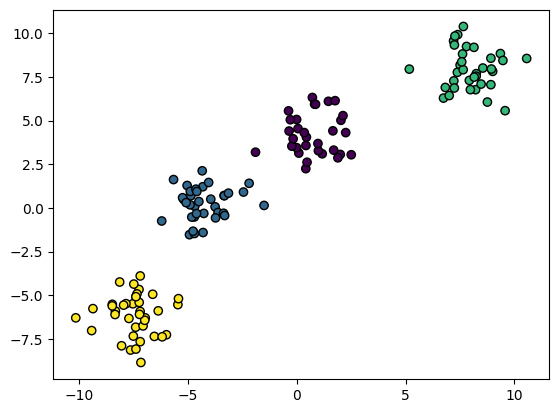

X_train shape : (140, 3)
Y_train shape : (140, 4)
X_test shape : (60, 3)
y_test shape : (60, 4)


In [106]:
## Generate four categories data
X, y = make_blobs(n_samples=200, n_features=2, centers=4, random_state=3)  # state 12

# transform y to onehot vector
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(Y_train, axis=1), edgecolors='black')
plt.show()

o_train = np.ones([X_train.shape[0], 1], dtype=X_train.dtype)
o_test = np.ones([X_test.shape[0], 1], dtype=X_test.dtype)
X_train = np.concatenate((o_train, X_train), axis=1)
X_test = np.concatenate((o_test, X_test), axis=1)
print("X_train shape : {0}".format(X_train.shape))
print("Y_train shape : {0}".format(Y_train.shape))
print("X_test shape : {0}".format(X_test.shape))
print("y_test shape : {0}".format(Y_test.shape))

In [107]:
# Softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # avoid overflow
    return e_z / np.sum(e_z, axis=1, keepdims=True)

In [108]:
# Cross-entropy loss
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))  # avoid log(0)

In [109]:
# Predict function
def predict(X, W):
    logits = np.dot(X, W)
    probs = softmax(logits)
    return probs

In [110]:
# Gradient computation
def compute_gradient(X, y_true, y_pred):
    return np.dot(X.T, (y_pred - y_true)) / X.shape[0]

In [119]:
# Training with Gradient Descent
def train_softmax(X, y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    W = np.zeros((n_features, n_classes))  # weights

    losses = []

    for i in range(epochs):
        y_pred = predict(X, W)
        loss = cross_entropy(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        W -= lr * grad
        losses.append(loss)

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W, losses

In [120]:
# Train model
W, losses = train_softmax(X_train, Y_train, lr=0.5, epochs=5000)

Epoch 0, Loss: 1.3863
Epoch 100, Loss: 0.0436
Epoch 200, Loss: 0.0310
Epoch 300, Loss: 0.0249
Epoch 400, Loss: 0.0211
Epoch 500, Loss: 0.0184
Epoch 600, Loss: 0.0164
Epoch 700, Loss: 0.0148
Epoch 800, Loss: 0.0135
Epoch 900, Loss: 0.0124
Epoch 1000, Loss: 0.0115
Epoch 1100, Loss: 0.0107
Epoch 1200, Loss: 0.0100
Epoch 1300, Loss: 0.0094
Epoch 1400, Loss: 0.0089
Epoch 1500, Loss: 0.0084
Epoch 1600, Loss: 0.0080
Epoch 1700, Loss: 0.0076
Epoch 1800, Loss: 0.0073
Epoch 1900, Loss: 0.0070
Epoch 2000, Loss: 0.0067
Epoch 2100, Loss: 0.0064
Epoch 2200, Loss: 0.0062
Epoch 2300, Loss: 0.0059
Epoch 2400, Loss: 0.0057
Epoch 2500, Loss: 0.0055
Epoch 2600, Loss: 0.0054
Epoch 2700, Loss: 0.0052
Epoch 2800, Loss: 0.0050
Epoch 2900, Loss: 0.0049
Epoch 3000, Loss: 0.0047
Epoch 3100, Loss: 0.0046
Epoch 3200, Loss: 0.0045
Epoch 3300, Loss: 0.0044
Epoch 3400, Loss: 0.0042
Epoch 3500, Loss: 0.0041
Epoch 3600, Loss: 0.0040
Epoch 3700, Loss: 0.0039
Epoch 3800, Loss: 0.0039
Epoch 3900, Loss: 0.0038
Epoch 4000, 

In [121]:
# Evaluate
def accuracy(y_true, y_pred_probs):
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    return np.mean(y_true_labels == y_pred_labels)

train_acc = accuracy(Y_train, predict(X_train, W))
test_acc = accuracy(Y_test, predict(X_test, W))

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 100.00%


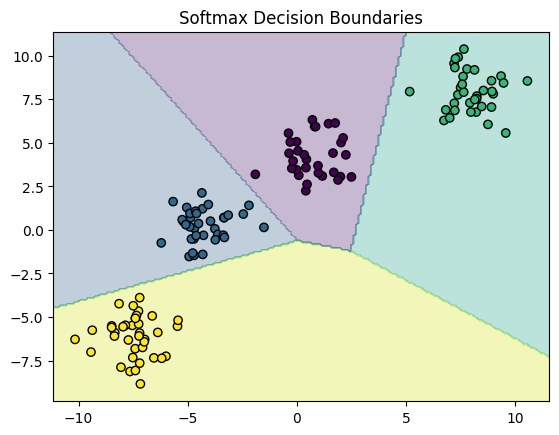

In [114]:
# Plot decision boundaries
def plot_decision_boundary(X, y, W):
    x_min, x_max = X[:,1].min() - 1, X[:,1].max() + 1
    y_min, y_max = X[:,2].min() - 1, X[:,2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    X_grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
    Z = np.argmax(predict(X_grid, W), axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 1], X[:, 2], c=np.argmax(y, axis=1), edgecolors='k')
    plt.title("Softmax Decision Boundaries")
    plt.show()

plot_decision_boundary(X_train, Y_train, W)

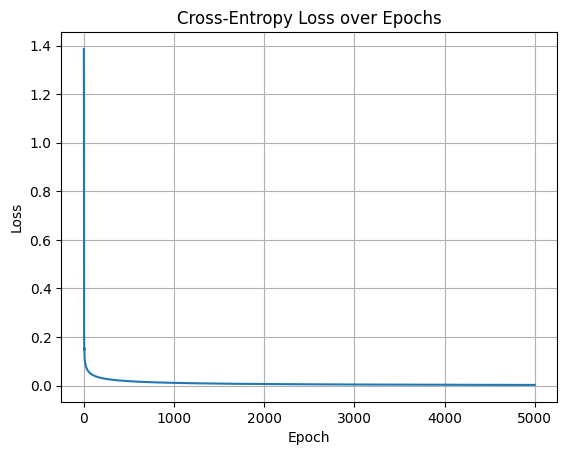

In [115]:
# Plot Loss Curve
plt.plot(losses)
plt.title("Cross-Entropy Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()